# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Preprocessing
This part is from assignment 2.

In [371]:
# import
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

# - Load the raw data from the file 'alldata.xlsx' into a pandas dataframe.
raw_data = pd.read_excel('alldata.xlsx')

# Utility function - Rename the columns to be more descriptive
def rename_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Renaming the columns for the TV2 answers.
    # So the names are easier to understand and work with.
    tv2_original_columns = ['1a','1b','2a','2b','3a','3b','4a','4b',
                            '5a','5b','6a','6b','7a','7b','8a','8b',
                            '9a','9b','10a','10b','11a','11b','12a','12b']
    tv2_new_columns = ['TV2-1a','TV2-1b','TV2-2a','TV2-2b','TV2-3a','TV2-3b','TV2-4a','TV2-4b',
                       'TV2-5a','TV2-5b','TV2-6a','TV2-6b','TV2-7a','TV2-7b','TV2-8a','TV2-8b',
                       'TV2-9a','TV2-9b','TV2-10a','TV2-10b','TV2-11a','TV2-11b','TV2-12a','TV2-12b']
    
    # ? Renaming the columns for the DR answers.
    # So the names are easier to understand and work with.
    dr_orignal_columns = ['530','531','533','534','535','537','538','540','541','543','544','545','546','547','548',
                          '550','551','552','553','555','556','557','559','561','563']
    
    dr_new_columns =  ['DR-1','DR-2','DR-3','DR-4','DR-5','DR-6','DR-7','DR-8','DR-9','DR-10','DR-11','DR-12','DR-13','DR-14','DR-15',
                       'DR-16','DR-17','DR-18','DR-19','DR-20','DR-21','DR-22','DR-23','DR-24','DR-25']

    other_columns_original = ['navn','alder','parti','storkreds']
    other_columns_new = ['Name','Age','Party','District']

    # ! Renaming the actual columns
    data.rename(columns=dict(zip(tv2_original_columns, tv2_new_columns)), inplace=True)
    data.rename(columns=dict(zip(dr_orignal_columns, dr_new_columns)), inplace=True)
    data.rename(columns=dict(zip(other_columns_original, other_columns_new)), inplace=True)
    
    return data

# Utility function - Set the column order to be more intuitive
def reorder_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Reordering the columns
    # So the columns are easier to understand and work with.
    strict_column_order = ['Name','Age','Party','District'];
    remaining_columns = [col for col in data.columns if col not in strict_column_order]
    data = data[strict_column_order + remaining_columns]
    return data

# * Create a DataFrame
raw_dataFrame = pd.DataFrame(raw_data)

# ! Renaming the columns
clean_dataFrame = rename_columns(raw_dataFrame)

# ! Reordering the columns
clean_dataFrame = reorder_columns(raw_dataFrame)

# ? Cleaning party names
clean_dataFrame['Party'] = clean_dataFrame['Party'].replace('Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Frie Grønne')

# * Preview the cleaned DataFrame
preview_dataFrame = clean_dataFrame.head(5)
preview_dataFrame = preview_dataFrame.style.set_caption('Cleaned DataFrame')

display(preview_dataFrame.hide())

Name,Age,Party,District,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,DR-11,DR-12,DR-13,DR-14,DR-15,DR-16,DR-17,DR-18,DR-19,DR-20,DR-21,DR-22,DR-23,DR-24,DR-25,TV2-1a,TV2-1b,TV2-2a,TV2-2b,TV2-3a,TV2-3b,TV2-4a,TV2-4b,TV2-5a,TV2-5b,TV2-6a,TV2-6b,TV2-7a,TV2-7b,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Lars Philipsen Prahm,78,Moderaterne,Københavns Storkreds,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1
Karsten Hønge,64,Socialistisk Folkeparti,Fyns Storkreds,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0
Martin Kelleher-Petersen,37,Alternativet,Bornholms Storkreds,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2
Nicklas Gjedsig Larsen,28,Alternativet,Nordjyllands Storkreds,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0
Tom Gillesberg,58,Løsgænger,Københavns Storkreds,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2


# Analysis

### PCA setup

Here we get the questions form the data set

In [372]:
columns_to_drop = ["Name", "Age", "Party", "District"]  # Specify the columns you want to drop

# Create a copy of the DataFrame and drop the specified columns
questions_dataFrame = clean_dataFrame.drop(labels=columns_to_drop, axis=1)
display(questions_dataFrame)

,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,...,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
0,-1,-2,1,-2,2,1,-2,1,1,2,...,1,0,2,0,1,-2,-2,1,1,1
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,0,-2,0,-1,2,1,-2,0,0
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,1,1,-1,-2,0,2,0,-1,1,-2
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,-2,2,2,2,2,-1,2,0
4,1,1,-2,2,-2,1,-2,1,2,-2,...,1,0,-2,0,-1,0,-2,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,2,1,1,2,-1,2,1,-2,0,0
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,1,0,-1,0,-1,2,2,-2,0,0
864,1,1,1,-2,2,-1,1,-1,-1,1,...,1,0,-1,0,-1,2,2,-2,0,1
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,0,0,2,1,-2,1,0


Here we make the PCA

In [373]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(questions_dataFrame)

# transform data onto the first ten principal components
X_pca = pca.transform(questions_dataFrame)
print("Original shape: {}".format(str(questions_dataFrame.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

pca.explained_variance_ratio_

Original shape: (867, 49)
Reduced shape: (867, 10)


array([0.45607901, 0.11056386, 0.05043851, 0.03259873, 0.02766924,
       0.02107164, 0.01846719, 0.01538577, 0.01445813, 0.01359731])

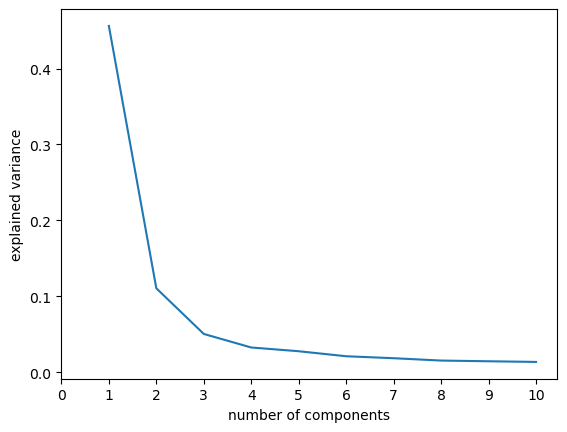

In [374]:
import numpy as np
#Explained variance
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

In [375]:
# keep the first ten principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to beast cancer data
pca.fit(questions_dataFrame)

# transform data onto the first two principal components
X_pca = pca.transform(questions_dataFrame)
print("Original shape: {}".format(str(questions_dataFrame.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

pca.explained_variance_ratio_

Original shape: (867, 49)
Reduced shape: (867, 2)


array([0.45607901, 0.11056386])

In [376]:
dr_new_columns =  ['DR-1','DR-2','DR-3','DR-4','DR-5','DR-6','DR-7','DR-8','DR-9','DR-10','DR-11','DR-12','DR-13','DR-14','DR-15',
                       'DR-16','DR-17','DR-18','DR-19','DR-20','DR-21','DR-22','DR-23','DR-24','DR-25']

tv2_new_columns = ['TV2-1a','TV2-1b','TV2-2a','TV2-2b','TV2-3a','TV2-3b','TV2-4a','TV2-4b',
                       'TV2-5a','TV2-5b','TV2-6a','TV2-6b','TV2-7a','TV2-7b','TV2-8a','TV2-8b',
                       'TV2-9a','TV2-9b','TV2-10a','TV2-10b','TV2-11a','TV2-11b','TV2-12a','TV2-12b']

feature_names = dr_new_columns + tv2_new_columns

### An analysis/description of which questions are most crucial concerning their placement on the axes.

Text(0, 0.5, 'Principal components')

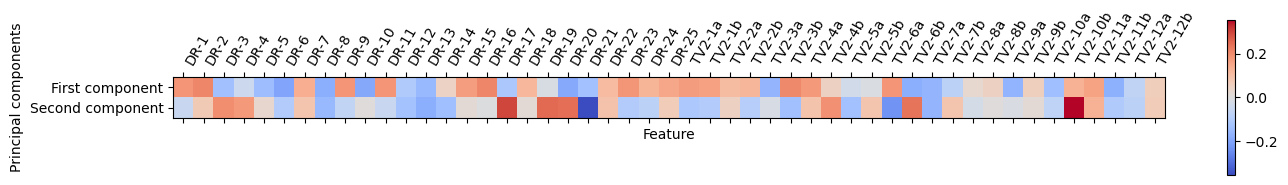

In [377]:
plt.matshow(pca.components_, cmap='coolwarm')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [378]:
PCA1_abs = [abs(number) for number in pca.components_[0]]

PCA1 = pd.DataFrame({
    'feature_names': feature_names,
    'PCA': pca.components_[0],
    'PCA_abs': PCA1_abs,
})

sorted_df1 = PCA1.sort_values(by='PCA_abs', ascending=False)
sorted_df1.head(6)

,feature_names,PCA,PCA_abs
1,DR-2,0.205416,0.205416
15,DR-16,0.205066,0.205066
30,TV2-3b,0.204075,0.204075
5,DR-6,-0.198883,0.198883
9,DR-10,-0.193057,0.193057
19,DR-20,-0.189554,0.189554


All right here we take the top 6 and look at the questions:
1. DR-2 (531) ARBEJDSMARKED OG ØKONOMI - Der skal indføres en særlig skat på de allerhøjeste indkomster
2. DR-16 (550)  ARBEJDSMARKED OG ØKONOMI - Der skal indføres kvoter, der sikrer mindst 30 procent kvinder i virksomheders bestyrelser
3. TV2-3b Udenrigs- og forsvarspolitik - Ulandsbistanden bør hæves.
4. DR-6 (537) VELFÆRD - Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere
5. DR-10 (543) VELFÆRD - Det er en god idé, at dagpengesatsen for nyuddannede er sat ned
6. DR-20 (555) EU OG UDENRIGS - Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles

The first principal component analysis (PCA) focuses on economic factors. In this context, a positive score indicates higher taxes, while a negative score suggests lower taxes.
 

In [379]:
PCA2_abs = [abs(number) for number in pca.components_[1]]

PCA2 = pd.DataFrame({
    'feature_names': feature_names,
    'PCA': pca.components_[1],
    'PCA_abs': PCA2_abs,
})

sorted_df2 = PCA2.sort_values(by='PCA_abs', ascending=False)
sorted_df2.head(10)

,feature_names,PCA,PCA_abs
20,DR-21,-0.356049,0.356049
44,TV2-10b,0.355004,0.355004
16,DR-17,0.298896,0.298896
18,DR-19,0.249885,0.249885
19,DR-20,0.243982,0.243982
36,TV2-6b,0.237322,0.237322
35,TV2-6a,-0.232349,0.232349
2,DR-3,0.196218,0.196218
32,TV2-4b,0.191510,0.191510
12,DR-13,-0.180345,0.180345


All right here we take the top 10 and look at the questions:
1. DR-21 (556) ARBEJDSMARKED OG ØKONOMI - Den såkaldte Arne-pension skal afskaffes
2. TV2-10b Socialområdet - Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.
3. DR-17 (551) EU OG UDENRIGS - Der skal være permanent grænsekontrol mellem Danmark og Tyskland
4. DR-19 (553)  UDDANNELSE - Der skal udflyttes flere uddannelsespladser fra de store byer
5. DR-20 (555) EU OG UDENRIGS - Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles
6. TV2-6b Flygtninge og indvandrere - Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.
7. TV2-6a Flygtninge og indvandrere - Den danske udlændingepolitik er for stram.
8. DR-3 (533) RET OG STRAF - Kriminalitet begået i udsatte boligområder skal straffes særligt hårdt
9. TV2-4b Økonomi - Staten bør i højere grad kompensere danskerne for de stigende priser, som inflationen har medført.
10. DR-13 (546) KLIMA OG ENERGI - Danmark skal undersøge muligheden for at udvikle A-kraft som energikilde herhjemme 

# TODO UPDATE
The second principal component analysis (PCA) explores the topics of Arne pensions and the presence of refugees and immigrants. A positive score in this PCA signifies support for maintaining the Arne pension and a preference for fewer immigrants. Conversely, a negative score indicates a preference for more immigrants and the removal of the Arne pension.

### Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

In [380]:
dataFrame = clean_dataFrame.copy().drop(labels=["Name", "Age", "District"], axis=1)
party_avg = dataFrame.groupby('Party')[feature_names].mean()
display(party_avg)

,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,...,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Party,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.880597,1.134328,-1.895522,-1.820896,-0.776119,-1.641791,-0.716418,0.283582,1.149254,-1.432836,...,1.268657,1.134328,-1.477612,0.164179,-0.149254,1.029851,0.164179,0.492537,0.492537,-0.671642
Danmarksdemokraterne,-0.837838,-1.378378,1.513514,-0.972973,1.756757,0.189189,-1.864865,1.054054,-1.918919,0.972973,...,1.000000,0.729730,0.567568,-0.702703,0.918919,1.918919,-1.972973,1.891892,0.486486,0.297297
Dansk Folkeparti,-0.571429,-1.081633,1.551020,1.653061,1.551020,0.000000,-1.551020,0.734694,-1.448980,0.510204,...,0.979592,0.489796,0.816327,-0.306122,0.918367,1.448980,-1.693878,1.795918,0.816327,-0.693878
Det Konservative Folkeparti,-0.836735,-1.877551,0.948980,-1.714286,1.816327,1.408163,-1.979592,1.663265,-1.255102,1.397959,...,1.142857,0.275510,0.500000,-0.295918,1.469388,-1.612245,-1.806122,1.806122,0.765306,-0.295918
Enhedslisten,1.959459,1.864865,-1.918919,0.405405,-1.662162,-1.878378,0.418919,-1.797297,1.635135,-1.783784,...,0.824324,0.445946,-1.824324,0.283784,-1.040541,1.905405,0.702703,-1.162162,-0.554054,0.108108
Frie Grønne,1.923077,1.923077,-2.000000,-1.692308,-1.769231,-2.000000,-1.769231,-1.461538,1.692308,-1.884615,...,1.230769,0.538462,-1.692308,0.461538,-0.461538,1.615385,-1.115385,1.346154,0.000000,0.269231
Kristendemokraterne,0.880952,-0.666667,-1.285714,-1.595238,1.190476,-0.428571,-1.047619,0.976190,-0.571429,0.071429,...,1.642857,0.928571,-0.690476,0.357143,0.595238,-1.333333,-0.976190,1.023810,1.023810,-0.309524
Liberal Alliance,-1.142857,-1.971429,-0.857143,-1.271429,1.671429,1.900000,-2.000000,1.971429,-1.342857,1.614286,...,0.585714,-0.214286,1.385714,-0.771429,1.671429,-1.928571,-1.957143,1.871429,1.571429,-1.614286
Løsgænger,0.000000,-0.666667,-0.333333,1.000000,0.666667,0.666667,-1.666667,1.333333,2.000000,0.333333,...,1.000000,-1.000000,0.000000,0.000000,0.333333,0.666667,-0.666667,0.000000,1.666667,-2.000000


Here we selected the two most crucial questions foreach PCA

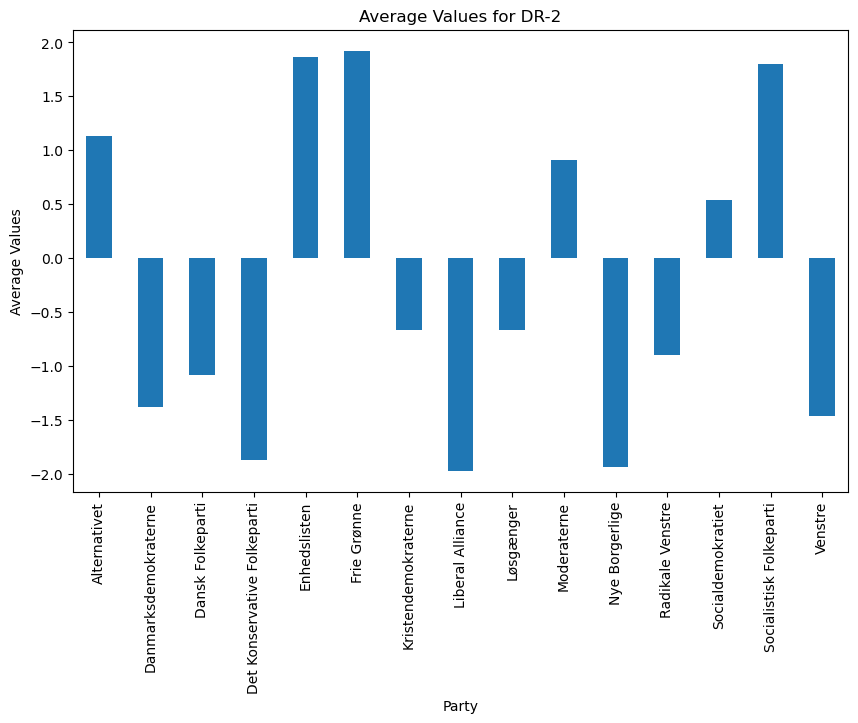

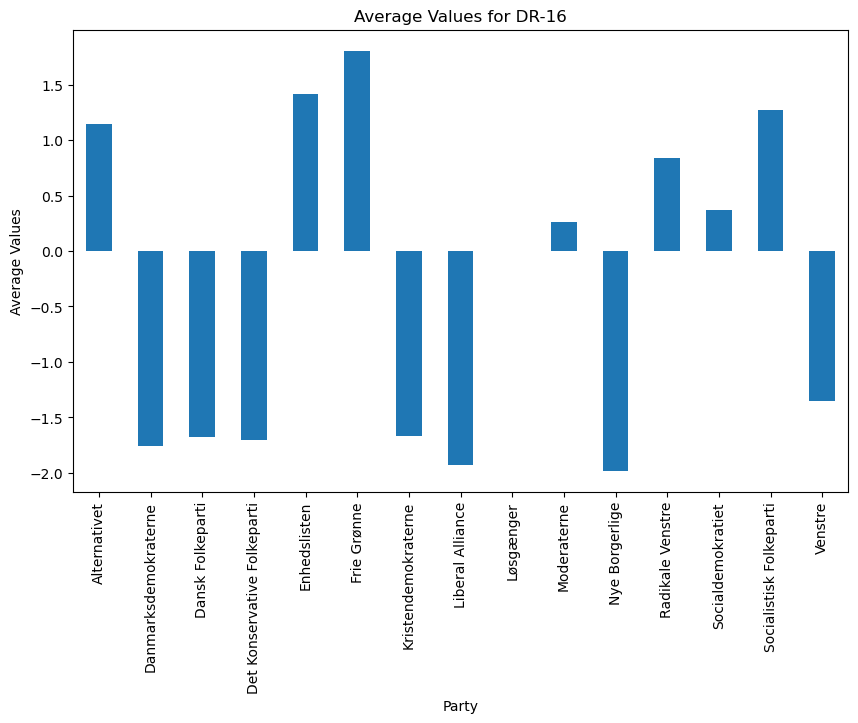

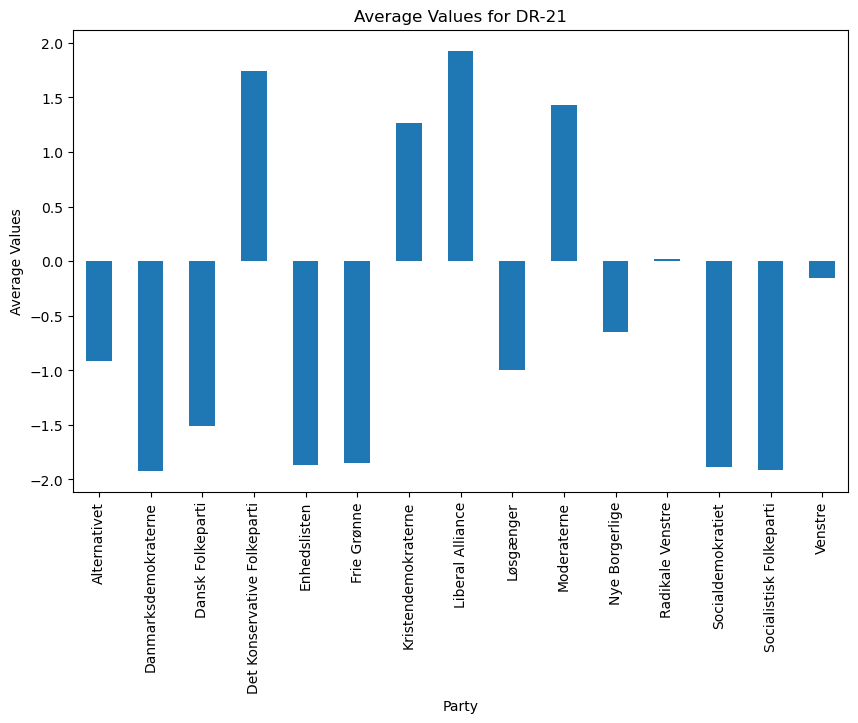

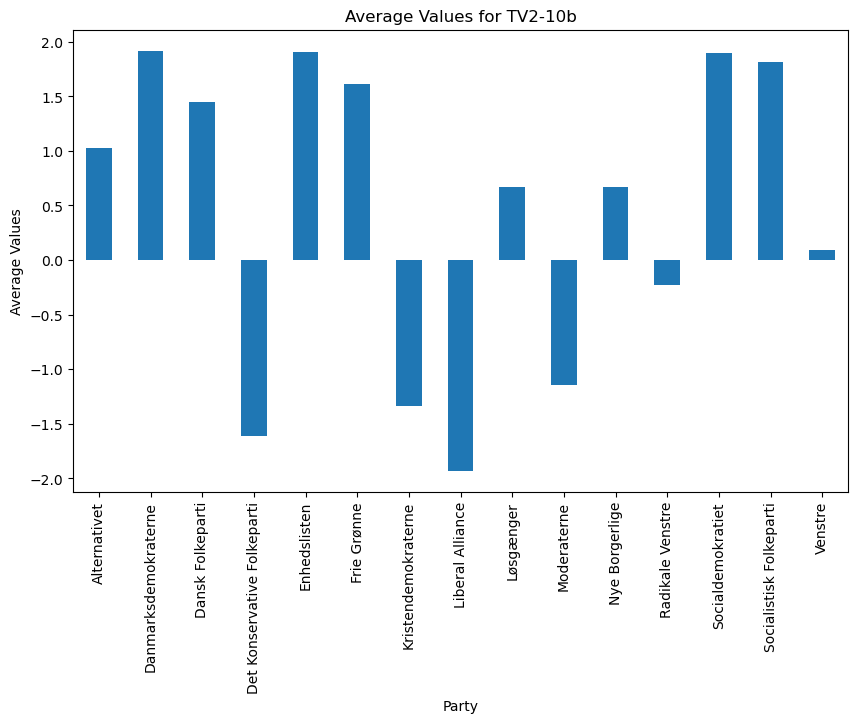

In [381]:
listOfQuestion = ["DR-2", "DR-16", "DR-21", "TV2-10b"]

# Looping through each column in the transposed DataFrame
for metric in listOfQuestion:
    # Plotting a bar chart for each metric
    party_avg[metric].plot(kind='bar', title=f'Average Values for {metric}', figsize=(10, 6))
    plt.xlabel('Party')  # Corrected from 'Questions' to 'Party' to reflect what's on the x-axis
    plt.ylabel('Average Values')  # This label describes what the y-axis represents
    plt.show()

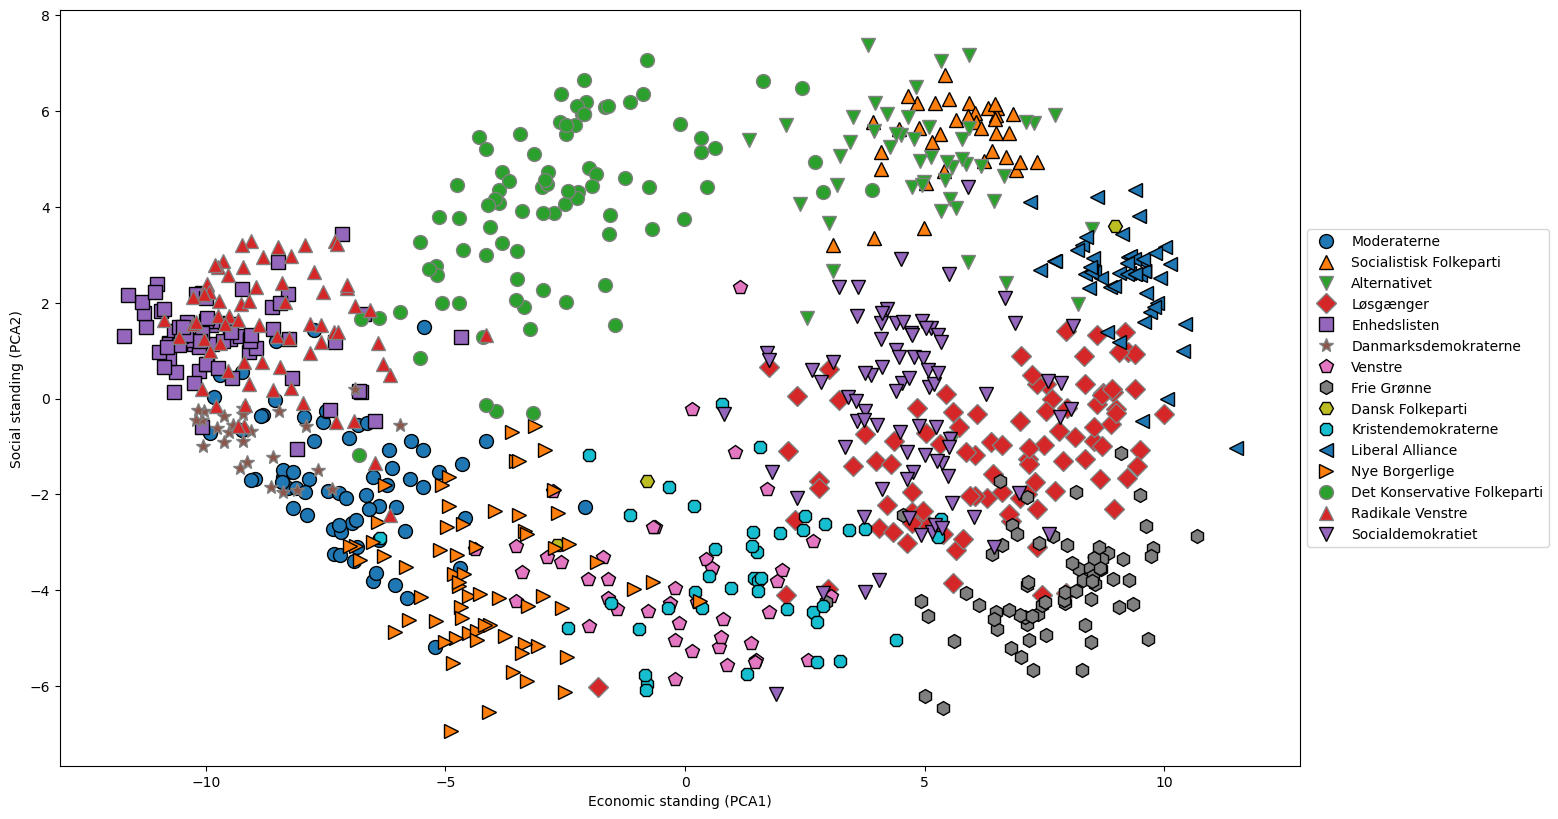

In [382]:
df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df['Name'] = clean_dataFrame['Name']
df['Party'] = clean_dataFrame['Party']

# Negate Component 1
df['Component 1'] = df['Component 1'] * -1

columns_titles = ['Name', 'Party','Component 1', 'Component 2']
df = df.reindex(columns=columns_titles)

plt.figure(figsize=(16, 16))
mglearn.discrete_scatter(df['Component 1'], df['Component 2'], df.Party)
plt.legend(df.Party.unique(), loc="center left", bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect("equal")
plt.xlabel("Economic standing (PCA1)")
plt.ylabel("Social standing (PCA2)")
plt.show()

### A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

### K-Means

c:\Users\bjark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


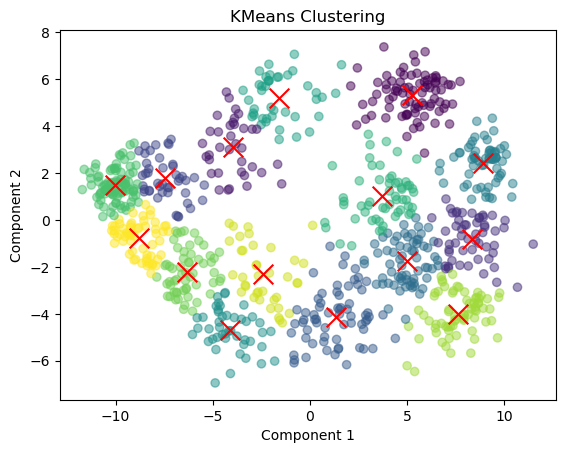

In [383]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Component 1' and 'Component 2'
kmeans = KMeans(n_clusters=15)  # Specify the number of clusters
kmeans.fit(df[['Component 1', 'Component 2']])  # Fit the KMeans model to your data
labels = kmeans.labels_  # Get the cluster labels assigned to each data point
centroids = kmeans.cluster_centers_  # Get the centroids of the clusters

# Now you can use 'labels' to identify which cluster each data point belongs to
# 'centroids' contains the coordinates of the centroids of the clusters

# Visualizing the clusters
plt.scatter(df['Component 1'], df['Component 2'], c=labels, cmap='viridis', alpha=0.5)  # Plot the data points colored by cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200)  # Plot centroids
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans Clustering')
plt.show()

### Hierarchical clustering

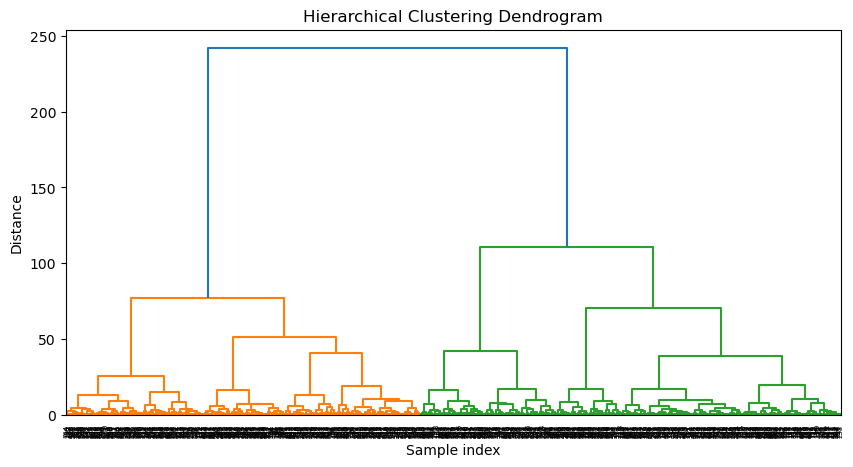

In [384]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Component 1' and 'Component 2'
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Setting distance_threshold=0 to get the full dendrogram
labels = agg_clustering.fit_predict(df[['Component 1', 'Component 2']])  # Fit and predict clusters

# Compute the linkage matrix
Z = linkage(df[['Component 1', 'Component 2']], 'ward')  # You can change 'ward' to other linkage methods as needed

# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

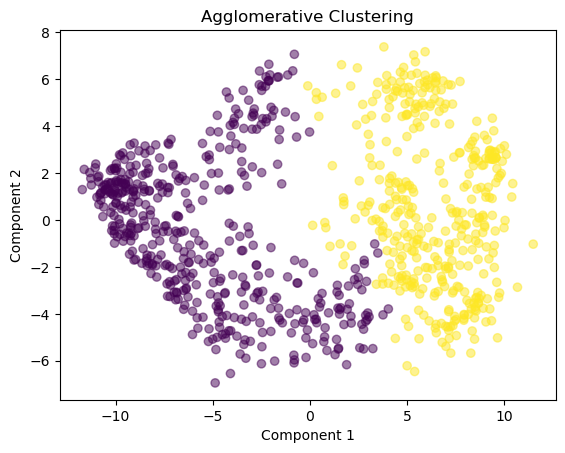

In [385]:
# Assuming df is your DataFrame containing 'Component 1' and 'Component 2'
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Specify the number of clusters
labels = agg_clustering.fit_predict(df[['Component 1', 'Component 2']])  # Fit and predict clusters

# Visualizing the clusters
plt.scatter(df['Component 1'], df['Component 2'], c=labels, cmap='viridis', alpha=0.5)  # Plot the data points colored by cluster
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Agglomerative Clustering')
plt.show()

### DBSCAN

In [386]:
def calculate_k_distance(X, k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            # Convert DataFrame rows to NumPy arrays for computing distance
            dist.append(np.linalg.norm(X.values[i, :] - X.values[j, :]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

In [387]:
X = df[['Component 1', 'Component 2']]  # Assuming 'Component 1' and 'Component 2' are the columns in your DataFrame
k = 4
k_distances = calculate_k_distance(X, k)

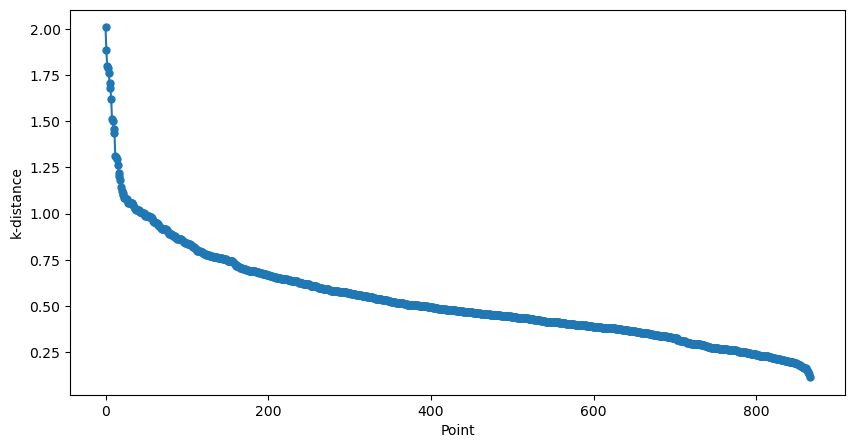

In [388]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(X)), k_distances, '.-', markersize=10)
plt.xlabel('Point')
plt.ylabel('k-distance')
plt.show()

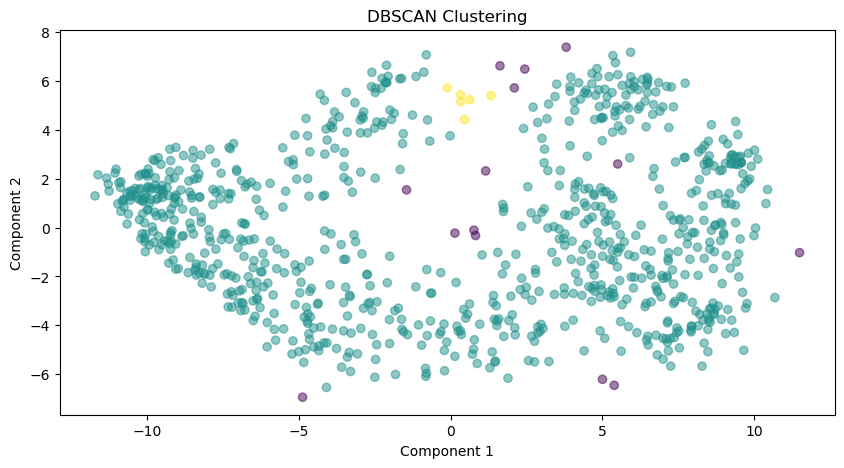

In [389]:
eps = 1  # The maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X['Component 1'], X['Component 2'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DBSCAN Clustering')
plt.show()

### An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

1. Take the mean of the hole data set and finde the person that are longets from the mean
2. Take the mean for each party and finde the to parties that are longets from each
3. Finde the to candidates that are longets form each

#### Take the mean of the hole data set and finde the person that are longets from the mean

In [ ]:
# Create a copy of the DataFrame
dfDist = df.copy()

# Calculate means
comp1Mean = dfDist["Component 1"].mean()
comp2Mean = dfDist["Component 2"].mean()

# Initialize the new column with NaNs
dfDist['Distance From Mean'] = np.nan

# Define the distance calculation function
def calcDistance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
# Loop over the DataFrame index
for i in dfDist.index:
    x1 = dfDist.loc[i, "Component 1"]
    y1 = dfDist.loc[i, "Component 2"]
    
    x2 = comp1Mean
    y2 = comp2Mean
    
    # Calculate distance
    dist = calcDistance(x1, y1, x2, y2)
    
    # Assign distance to the DataFrame
    dfDist.loc[i, 'Distance From Mean'] = dist

# Display the DataFrame
max_distance = dfDist["Distance From Mean"].max()
print(dfDist[dfDist['Distance From Mean'] == max_distance])

#### Take the mean for each party and finde the to parties that are longets from each

#### Finde the to candidates that are longets form each

In [412]:
def find_Max_distance(X):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            point_i = X.loc[i, ['Component 1', 'Component 2']].values
            point_j = X.loc[j, ['Component 1', 'Component 2']].values

            # Calculate the Euclidean distance between the two points
            distance = np.linalg.norm(point_i - point_j)
            
            new_row_data = {'from': i, 'fromName': X.loc[i, 'Name'], 'to': j, 'toName': X.loc[j, 'Name'], 'dist': distance}
            
            dist.append(new_row_data)
        
        dist_df = pd.DataFrame(dist)
        sorted_df = dist_df.sort_values(by=['dist'], ascending=False)
        print("sorted_df")
        display(sorted_df)

        k_distance.append(sorted_df.iloc[0].to_dict())  # Append the first row as a dictionary to k_distance

    dist_df = pd.DataFrame(k_distance)
    sorted_k_distance = pd.DataFrame(k_distance).sort_values(by=['dist'], ascending=False)
    return sorted_k_distance

# Assuming df is your DataFrame
result = find_Max_distance(df)
display(result)

AttributeError: 'DataFrame' object has no attribute 'append'